# Plotting the data

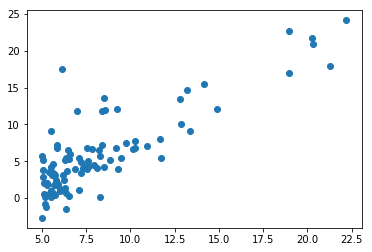

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt('ex1data1.txt',delimiter = ',')
X = np.ones((2,97))
y = np.zeros((1,97))
X[1,:] = data[:,0]
#print(X)
y[0,:] = data[:,1]

plt.scatter(data[:,0], data[:,1])


# Cost function computation

In [192]:
def computecost(X, y, theta=np.array([[0, 0]])):
    m = y.size
    h = np.dot(theta,X)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

computecost(X, y)

32.072733877455676

# Gradient descent

[-3.63029144  1.16636235]


Text(0,0.5,'cost')

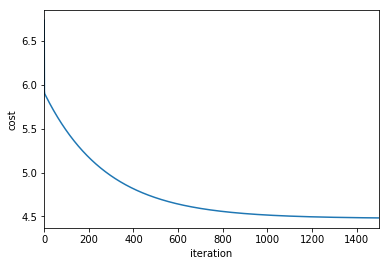

In [193]:
def gradientdescent(X, y, theta=np.array([[0.0, 0.0]]), learning_rate = 0.01, iter_num = 1500):
    
    m = y.size
    J_history = np.zeros(iter_num)
    
    for i in range(iter_num):
        h = np.dot(theta,X)
        g = np.dot(h-y,X.T)
        theta -= learning_rate*(1/m)*g
        J_history[i] = computecost(X, y, theta)
        #print(J_history[i])
    
    return theta, J_history

theta, J_h = gradientdescent(X, y)
print(theta.ravel())#다차원 배열을 1차원 배열로 펴줌.
plt.plot(J_h)
plt.xlim(0,1500)
plt.xlabel('iteration')
plt.ylabel('cost')

# Linear Regression Plot

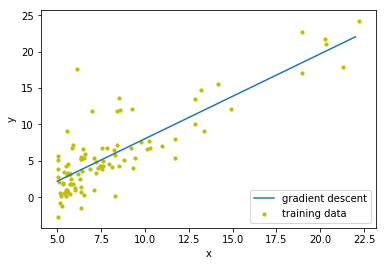

In [206]:
xx = np.arange(5,23)
yy = theta[0][0] + theta[0][1]*xx
plt.plot(xx, yy, label= "gradient descent")
plt.scatter(data[:,0], data[:,1], s=10, c='y', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4)

# Cost function 3d plot

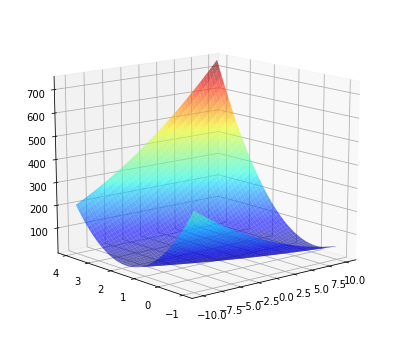

In [279]:
theta0 = np.linspace(-10, 10, 50)
theta1 = np.linspace(-1, 4, 50)
[xx, yy] = np.meshgrid(theta0, theta1)
z1 = np.zeros((theta0.size,theta1.size))
z2 = np.zeros((theta0.size,theta1.size))

for i in np.arange(theta0.size):
    for j in np.arange(theta1.size):
        z2[i,j] = computecost(X, y, [[xx[i,j],yy[i,j]]])
        #print(theta0[i], theta1[j])
        #print(xx[i,j], yy[i,j])
        #print('\n')
        
fig = plt.figure(figsize=(15,6))

ax2 = fig.add_subplot(121,projection='3d')

ax2.plot_surface(xx, yy, z2, alpha=0.6, rstride=1, cstride=1, cmap=plt.cm.jet)
ax2.set_zlim(z2.min(),z2.max())
ax2.view_init(elev=15, azim=230)
